1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

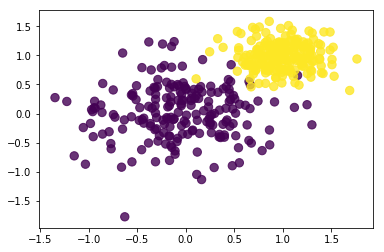

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [178]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp
from scipy import stats
import pandas as pd
import pickle
import math
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [168]:
#sns.set(style="white")

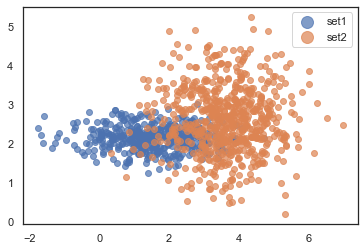

In [165]:
n=2 #clusters
mean=5 #bound for the range of the means
std=2 #upper bound for the std

fig, ax = plt.subplots(nrows=1, ncols=1)

for i in range(n):
    size=np.random.randint(100,1000) #size of the cluster in this range
    m1=np.random.uniform(-mean,mean)
    m2=np.random.uniform(-mean,mean)
    std1=np.random.uniform(0,std)
    std2=np.random.uniform(0,std)
    x = np.random.normal(m1,std1,size)
    y = np.random.normal(m2,std2,size)

    ax.scatter(x,y,alpha=0.7,label='set'+str(i+1)) #one for each cluster

ax.legend(markerscale=2)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [166]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

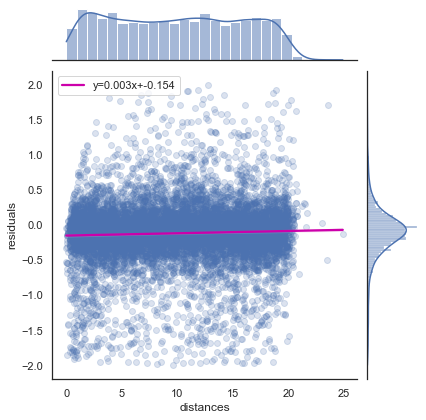

In [169]:
file = pd.read_pickle('data/residuals_261.pkl')
data_pickle = np.array(file, ndmin=1)
data = data_pickle[0]
df = pd.DataFrame(data)
df = df[np.abs(df['residuals'])<2]

#to consider only the first two values
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df['distances'], df['residuals'])

#seaborn jointplot
joint = sns.jointplot(x='distances', y='residuals', data=df, kind='reg',scatter_kws={'alpha':0.2},line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept),'color':'#cc00aa'})
joint.ax_joint.legend()

#### Comment on the correlation

We can say that the correlation between the variables is low. In fact, if the distance increases, the other varibale will not change its behavior (it is possible to notice that the values have a very similar distributions among all the x axis on the graph).

Profile histogram for the "distance" variable by hand: 


Text(0, 0.5, 'Entries')

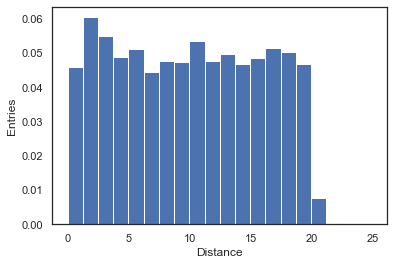

In [170]:
print('Profile histogram for the "distance" variable by hand: ')
fig, ax = plt.subplots()
h, bins, _ = plt.hist(df['distances'], bins=20, density=True, cumulative=False)
#print(bins)
ax.set_xlabel('Distance')
ax.set_ylabel('Entries')

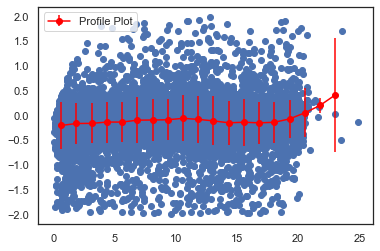

In [217]:
#array of bin centers
x = 0.5*(bins[1:] + bins[:-1])
y = np.zeros(x.size)
erry = np.zeros(x.size)

#y and erry arrays
y=np.array([df.loc[(df['distances'] >=bins[i]) & (df['distances'] <bins[i+1])]['residuals'].mean() for i in range(20)])
erry=np.array([df.loc[(df['distances'] >=bins[i]) & (df['distances'] <bins[i+1])]['residuals'].std() for i in range(20)])

#Plot the profile plot on top of the scatter plot
plt.scatter(df['distances'],df['residuals'])
plt.errorbar(x,y,erry, label='Profile Plot',linewidth=1.5,color='red',marker='o')
plt.legend()
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


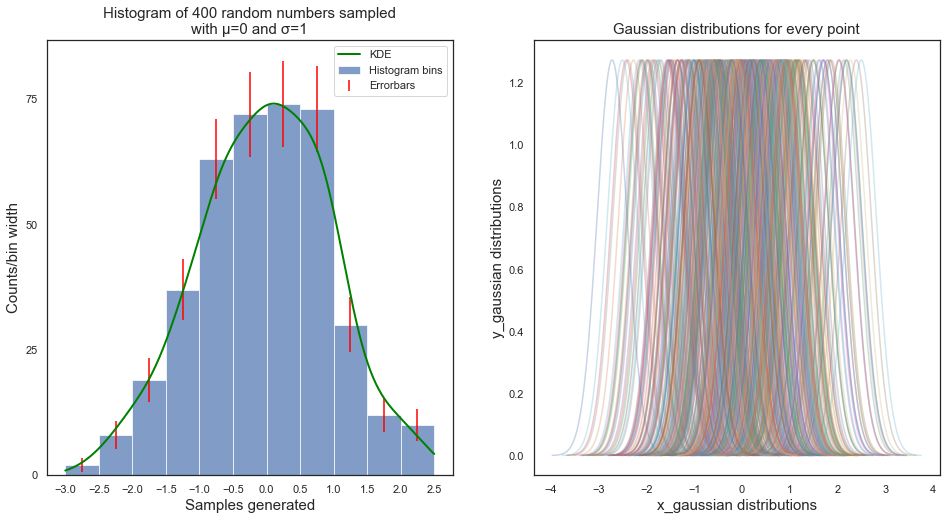

In [214]:
mean,std=0,1 
N=400
x=np.random.normal(mean,std,N)

width=int(std)/2
s=str(width)
p=s[::-1].find('.')

def roundup(x, prec=p, base=width):
  return round(base * math.ceil(float(x)/base),prec)
def rounddown(x, prec=p, base=width):
  return round(base * math.floor(float(x)/base),prec)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax1.set_ylabel('Counts/bin width', fontsize=15)
ax1.set_xlabel("Samples generated", fontsize=15)
ax1.set_title("Histogram of " + str(N) + " random numbers sampled" + "\n" "with μ=" + str(mean) + " and σ=" + str(std), fontsize=15)
height, edges, _ = ax1.hist(x, bins=np.arange(rounddown(x.min()),roundup(x.max())+width,width),label='Histogram bins', alpha=0.7)
centers = (edges[1:]+edges[:-1])/2
ax1.errorbar(centers, height, np.sqrt(height), fmt = 'none', label = "Errorbars", ecolor="red")
ax1.yaxis.set_major_locator(MultipleLocator(25))
ax1.xaxis.set_major_locator(MultipleLocator(width))

std_gauss = 1.06*x.std()*(x.size**(-1/5))

ax2.set_title('Gaussian distributions for every point', fontsize=15)
ax2.set_ylabel('y_gaussian distributions', fontsize=15)
ax2.set_xlabel('x_gaussian distributions', fontsize=15)

for c in x: 
    interval=np.linspace(c-4*std_gauss,c+4*std_gauss, 1000)#discretize from -4*sigma to +4*sigma with 1000 steps
    ax2.plot(interval, sp.stats.norm.pdf(interval,loc=c,scale=std_gauss), ls = '-', alpha = 0.3)

total_interval=np.linspace(rounddown(x.min()),roundup(x.max()), N+1)
z=np.zeros(0) #array empty 
for i in total_interval:
    z=np.append(z,width*np.sum(sp.stats.norm.pdf(x,loc=i,scale=std_gauss)))

#normalize
norm_gauss = sp.integrate.trapz(z, total_interval)
norm_hist = sp.integrate.trapz(height, centers)    

ax1.plot(total_interval,z*norm_hist/norm_gauss, color='green', linewidth=2, label='KDE')
ax1.legend(markerscale=2)